In [277]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import fft

In [278]:
np.random.seed(314)
def fourier(fn: callable, s=-5, dt=0.1, n=100, noise=False):
    x = np.linspace(s, s+dt*n, n)
    y = fn(x)
    ya = np.array(y, copy=True)
    if noise:
        y += np.random.uniform(-1, 1, x.shape)
    freqs = fft.fftshift(fft.fftfreq(n, dt))
    yfft = fft.fftshift(fft.fft(y))
    return ya, x, y, freqs, yfft

In [279]:
def plot(x_raw, y_raw, y_proc=None, y_actual=None):
    fig, ax = plt.subplots(2, 1)
    ax[0].set_title("Raw vs Processed")
    ax[0].plot(x_raw, y_raw, label="Raw")
    if y_proc is not None:
        ax[0].plot(x_raw, y_proc, label="Processed")
    if y_actual is not None:
        ax[0].plot(x_raw, y_actual, label="Actual")
    ax[0].legend()

    ax[1].set_title("Difference")
    ax[1].axhline(0)
    ax[1].plot(x_raw, y_proc-y_actual)

In [280]:
def plot_freq(x_raw, y_raw, y_proc=None, y_actual=None):
    fig, ax = plt.subplots(2, 1)
    ax[0].set_title("Raw vs Processed")
    ax[0].plot(x_raw, y_raw, label="Raw")
    if y_proc is not None:
        ax[0].plot(x_raw, abs(y_proc), label="Processed")
    if y_actual is not None:
        ax[0].plot(x_raw, abs(y_actual), label="Actual")
    ax[0].legend()

    ax[1].set_title("Difference")
    ax[1].axhline(0)
    ax[1].plot(x_raw, abs(y_proc)-abs(y_actual))

In [281]:
def butter(y, order, normalised_cutoff):
    # Design the Butterworth filter
    b, a = sp.signal.butter(order, normalised_cutoff)

    # Apply the filter to the signal using filtfilt to achieve zero-phase filtering
    return sp.signal.filtfilt(b, a, y)

In [282]:
np.random.seed(314)
def ft(fn: callable, s=0, dt=0.1, n=100, noise=True):
    x = np.linspace(s, s+dt*n, n)
    y = fn(x)
    ya = np.array(y, copy=True)
    yffta = fft.fftshift(fft.fft(ya))
    if noise:
        y += np.random.uniform(-1, 1, x.shape)
    freqs = fft.fftshift(fft.fftfreq(n, dt))
    yfft = fft.fftshift(fft.fft(y))

    fig, ax = plt.subplots(2)
    ax[0].set_title("Time domain")
    ax[0].plot(x, ya, label="Clean")
    ax[0].plot(x, y, label="Noisy")
    ax[0].legend()

    nyquist = 0.5/dt
    ax[1].set_title("Frequency domain")
    ax[1].plot(freqs, abs(yffta), label="Clean")
    ax[1].plot(freqs, abs(yfft), "--", label="Noisy")
    ax[1].axvline(nyquist, color="red")
    ax[1].set_xlim(0, max(max(freqs), nyquist))
    ax[1].legend()


In [283]:
def optim(y):
    def nrr(y, o, c):
        proc = butter(y, o, c)
        po = np.mean(np.square(y))
        pn = np.mean(np.square(y-proc))
        return np.log10(po/pn)

    o = np.linspace(1, 10, 1)
    c = np.linspace(0.1, 0.999, 1000)
    oo, cc = np.meshgrid(o, c)
    z = np.zeros_like(oo)

    for i1, v1 in enumerate(oo):
        for i2, v2 in enumerate(v1):
            ord = oo[i1, i2]
            cut = cc[i1, i2]
            z[i1, i2] = nrr(y, ord, cut)
    coord = np.unravel_index(np.argmin(z), z.shape)
    print(o[coord[1]], c[coord[0]])
    return o[coord[1]], c[coord[0]]

1.0 0.1


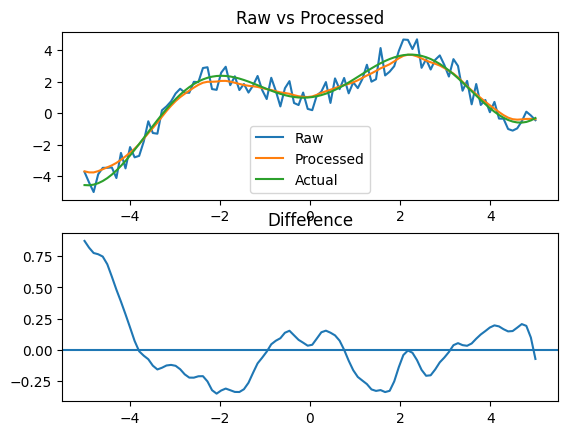

In [284]:
ya, x, y, freqs, yfft = fourier(lambda x: np.sin(x)*x + np.exp(0.3*x), noise=True)
y_proc = butter(y, *optim(y))
plot(x, y, y_proc, ya)


In [285]:
np.abs(np.sum(y - butter(y, 1.0, 0.781218218)))

0.003971060225529455

In [286]:
np.abs(np.sum(y - butter(y, 1.0, 0.6)))

0.04576608398974086